<a href="https://colab.research.google.com/github/Apaulgithub/Restaurant_Data_Analysis_and_Prediction/blob/main/Level%202/Restaurant_Insights_Enhancement_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Summary -**

In the second phase of my Data Science internship at Cognifyz Technologies, I embarked on a journey to enhance our understanding of the restaurant dataset through a series of focused tasks. This level 2 revolved around three key objectives:

**Task 1: Table Booking and Online Delivery Analysis**

- Calculated the percentage of restaurants offering table booking and online delivery services.
- Conducted a comparative analysis of average ratings for restaurants with and without table booking.
- Explored the availability of online delivery options across various price ranges, revealing valuable insights into customer preferences.

**Task 2: Price Range Analysis**

- Determined the most common price range among all restaurants.
- Computed the average rating for each price range, helping identify high-performing price segments.
- Identified the color associated with the highest average rating, simplifying the identification of top-rated price ranges.

**Task 3: Feature Engineering**

- Employed advanced feature engineering techniques to extract additional insights from existing columns.
- Generated new features like "Has Table Booking" and "Has Online Delivery" by encoding categorical variables, enhancing the dataset's intelligence.

This level of the project aimed to elevate our analysis by uncovering essential details related to table booking, delivery services, pricing, and feature engineering. The insights gained will contribute significantly to our data-driven decision-making process and project success.

## ***Task 1: Table Booking and Online Delivery***

### Import Libraries

In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset from github repository
df = pd.read_csv("C:\\Users\\bagal\\Downloads\\Dataset.csv")

### Percentage of Table Booking and Online Delivery

In [3]:
total_restaurants = len(df)

table_booking_percentage = (df['Has Table booking'] == 'Yes').sum() / total_restaurants * 100
online_delivery_percentage = (df['Has Online delivery'] == 'Yes').sum() / total_restaurants * 100

# Display results
print(f"Percentage of restaurants offering Table Booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants offering Online Delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants offering Table Booking: 12.12%
Percentage of restaurants offering Online Delivery: 25.66%


### Restaurants with and without Table Booking

In [4]:

avg_rating_with_table = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_table = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()


print(f"Average rating with Table Booking: {avg_rating_with_table:.2f}")
print(f"Average rating without Table Booking: {avg_rating_without_table:.2f}")

Average rating with Table Booking: 3.44
Average rating without Table Booking: 2.56


### Availability of Online Delivery

In [5]:

price_ranges = df['Average Cost for two'].apply(lambda x: 'Low' if x < 500 else 'Medium' if 500 <= x <= 1000 else 'High')
online_delivery_by_price_range = df.groupby(price_ranges)['Has Online delivery'].value_counts(normalize=True).unstack()

print("Online Delivery Availability by Price Range:")
print(online_delivery_by_price_range)

Online Delivery Availability by Price Range:
Has Online delivery         No       Yes
Average Cost for two                    
High                  0.719149  0.280851
Low                   0.858523  0.141477
Medium                0.566209  0.433791


### What did i found from the level 2 (task 1)?

* Percentage of restaurants offering Table Booking 12.12% and Online Delivery 25.66%
* Average rating with Table Booking 3.44 and without Table Booking: 2.56
* Online delivery availability for medium price range food product is better compare to high and low price range food product

## ***Task 2: Price Range Analysis***

### Most Common Price Range

In [6]:

most_common_price_range = df['Price range'].mode()[0]
print(f"Most Common Price Range: {most_common_price_range}")

Most Common Price Range: 1


### Average Rating for Each Price Range

In [7]:

avg_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()
print("Average rating for each price range:")
print(round(avg_rating_by_price_range,3))

Average rating for each price range:
Price range
1    2.000
2    2.941
3    3.683
4    3.818
Name: Aggregate rating, dtype: float64


### Highest Average Rating Among Different Price Ranges

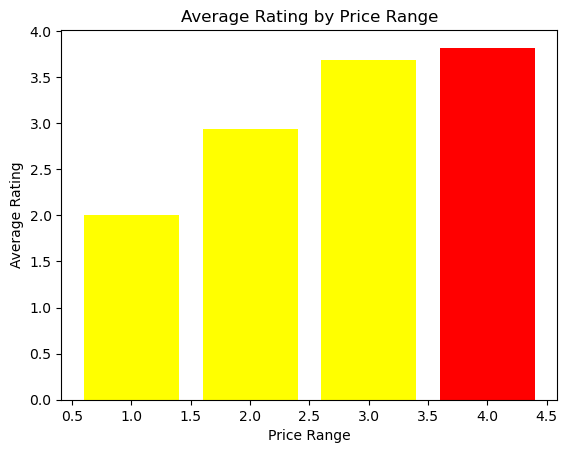

In [8]:
highest_avg_rating_color = avg_rating_by_price_range.idxmax()
plt.bar(avg_rating_by_price_range.index, avg_rating_by_price_range, color='yellow')
plt.bar(highest_avg_rating_color, avg_rating_by_price_range[highest_avg_rating_color], color='red')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')
plt.show()

### What did i found from the level 2 (task 2)?

* Most common price range among all the restaurants is 1
* Price range 4 get the highest average rating, which is 3.818. Followed by price range 3, 2 and 1

## ***Task 3: Feature Engineering***

### Extract Additional Features

In [25]:
# Extracting additional features from the existing columns, such as the length of the restaurant name or address
# Create a new column for the length of restaurant names
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)

# Create a new column for the length of restaurant addresses
df['Address Length'] = df['Address'].apply(len)

# Display the updated DataFrame
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,22,56
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,4,70
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,11,64


### Create New Features

In [26]:
# Creating new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables
# Create new binary columns
df['Has Table Booking'] = np.where(df['Has Table booking'] == 'Yes', 1, 0)
df['Has Online Delivery'] = np.where(df['Has Online delivery'] == 'Yes', 1, 0)

# Drop the original categorical columns if needed
# df = df.drop(['Has Table booking', 'Has Online delivery'], axis=1)

# Display the updated DataFrame
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table Booking,Has Online Delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,1,0


### What did i found from the level 2 (task 3)?

* Two new columns added, 'Restaurant Name length' and 'Address Length' from the length of the restaurant name or address
* Also two new binary column added by encoding categorical variables, 'Has Table booking' and 'Has Online delivery'

# ***Conclusion***

The insights which i found from the overall level 2 project:

**Table Booking and Online Delivery:**

- Approximately 12.12% of restaurants offer table booking, while 25.66% provide online delivery services.
- Restaurants with table booking have a significantly higher average rating of 3.44, compared to 2.56 for those without this service.
- Online delivery is more prevalent in restaurants with medium-priced food products.

**Price Range Analysis:**

- The most common price range among restaurants is 1.
- Restaurants in price range 4 achieve the highest average rating at 3.818, followed by price ranges 3, 2, and 1.

**Feature Engineering:**

- Introduced two new columns, 'Restaurant Name Length' and 'Address Length,' based on the length of restaurant names and addresses.
- Additionally, i created two binary columns, 'Has Table Booking' and 'Has Online Delivery,' by encoding categorical variables.

These findings provide valuable insights into the relationships between services, price ranges, and ratings in the restaurant dataset, enhancing our understanding of the industry.